**Módulo 13: Procesamiento de Lenguaje Natural (NLP) con Machine Learning**

**Conceptos clave:**

Fundamentos de NLP: tokenización, lematización, stop words.

Modelos de Bag of Words (BoW) y TF-IDF.

Modelos de clasificación de texto con Naive Bayes y SVM.

**Proyecto: Clasificación de sentimientos en redes sociales.**
    
Utilizar un dataset de reseñas de productos o comentarios en redes sociales para entrenar un modelo que clasifique los sentimientos (positivos/negativos).

**Proyecto en Español: Clasificación de Sentimientos en Comentarios de Redes Sociales**

**Objetivo:** Clasificar los comentarios en redes sociales en positivos y negativos utilizando técnicas de Procesamiento de Lenguaje Natural y Machine Learning.

**Paso 1: Instalación de librerías necesarias**

Primero, instalamos las librerías necesarias para el proyecto:

In [1]:
#!pip install numpy pandas scikit-learn nltk matplotlib seaborn

**Paso 2: Importar las librerías**

A continuación, importamos las librerías principales que vamos a utilizar.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

**Paso 3: Descargar dataset**

Para este proyecto, usaremos un dataset público de comentarios de redes sociales. Vamos a descargar el archivo CSV directamente desde una URL:

In [21]:
#url='/home/julio/jupyter_files/Curso_ML/tweets_politica_kaggle.csv'
#url = 'tu_dataset_url_aqui'  # Reemplaza con la URL o ruta de tu dataset
#import pandas as pd

url = '/home/julio/jupyter_files/Curso_ML/tweets_politica_kaggle.csv'

# Intenta leer el archivo CSV con opciones específicas para manejar comillas y caracteres de escape
try:
    df = pd.read_csv(
        url,
        sep=',',  # Ajusta el delimitador si es diferente
        quotechar='"',
        escapechar='\\',
        on_bad_lines='warn',  # O 'skip' para omitir líneas problemáticas
        encoding='utf-8'  # Ajusta la codificación si es necesario
    )
except pd.errors.ParserError as e:
    print(f"Error al leer el archivo CSV: {e}")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [22]:
df.head()
df2= df.sample(frac=0.005, random_state=42) 

In [23]:
# Dividir la única columna en múltiples columnas usando '\t' como delimitador
df2 = df['cuenta\tpartido\ttimestamp\ttweet'].str.split('\t', expand=True)

# Asignar nombres a las columnas
df2.columns = ['cuenta', 'partido', 'timestamp', 'tweet']

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109195 entries, 0 to 109194
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   cuenta     109195 non-null  object
 1   partido    109195 non-null  object
 2   timestamp  109195 non-null  object
 3   tweet      109195 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB


In [25]:
df2.timestamp	

0         1363973492.0
1         1364061035.0
2         1364116804.0
3         1364152692.0
4         1364153876.0
              ...     
109190    1679569934.0
109191    1679570026.0
109192    1679570122.0
109193    1679570502.0
109194    1679571534.0
Name: timestamp, Length: 109195, dtype: object

**Instalación de Librerías**

In [26]:
#!pip install pandas spacy textblob vaderSentiment
#!python -m spacy download es_core_news_sm  # Modelo en español para spaCy
#!pip install pandas spacy transformers vaderSentiment afinn
#python -m spacy download es_core_news_sm  # Modelo en español para spaCy
#!pip install pandas spacy transformers vaderSentiment afinn matplotlib seaborn sentistrength
#!python -m spacy download es_core_news_sm  # Modelo en español para spaCy

**Cargar y Preprocesar los Datos**

In [27]:
import pandas as pd
import re
import spacy

# Cargar el modelo en español de spaCy
nlp = spacy.load('es_core_news_sm')


# Función para limpiar el texto
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Eliminar URLs
    text = re.sub(r'@\w+', '', text)  # Eliminar menciones
    text = re.sub(r'#\w+', '', text)  # Eliminar hashtags
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\s+', ' ', text).strip()  # Eliminar espacios extras
    return text

In [28]:
df2['tweet_cleaned'] = df2['tweet'].apply(clean_text)

**Análisis de Sentimientos y Polaridad**

**Usando TextBlob para Polaridad y Subjetividad**

In [29]:
from textblob import TextBlob

def get_polarity(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.polarity  # Polaridad (-1 a 1)

def get_subjectivity(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.subjectivity  # Subjetividad (0 a 1)

In [30]:
df2['polarity_textblob'] = df2['tweet_cleaned'].apply(get_polarity)

In [31]:
df2['subjectivity_textblob'] = df2['tweet_cleaned'].apply(get_subjectivity)

In [32]:
#df2

**Usando VADER para Polaridad**

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    return sentiment['compound']  # Polaridad compuesta (-1 a 1)

In [34]:
df2['polarity_vader'] = df2['tweet_cleaned'].apply(get_vader_sentiment)

**Usando Transformers para Análisis de Sentimientos**

In [35]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

/home/julio/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [36]:
def get_sentiment(tweet):
    result = sentiment_pipeline(tweet)
    return result[0]['label'], result[0]['score']

In [ ]:
df2[['sentiment_label', 'sentiment_score']] = df2['tweet_cleaned'].apply(lambda x: pd.Series(get_sentiment(x)))

**Usando AFINN para Polaridad**

In [ ]:
from afinn import Afinn

afinn = Afinn(language='es')

In [ ]:
def get_afinn_sentiment(tweet):
    return afinn.score(tweet)  # Polaridad (positivo/negativo)

In [ ]:
df2['sentiment_afinn'] = df2['tweet_cleaned'].apply(get_afinn_sentiment)

**Usando SentiStrength para Emociones**

In [ ]:
from sentistrength import PySentiStr

senti = PySentiStr()
senti.setSentiStrengthPath('/ruta/a/SentiStrengthCom/')  # Ruta a SentiStrength
senti.setSentiStrengthLanguageFolderPath('/ruta/a/SentiStrengthData/')

In [ ]:
def get_sentistrength_emotion(tweet):
    result = senti.getSentiment(tweet, score='dual')
    return result[0], result[1]  # Devuelve el sentimiento positivo y negativo

In [ ]:
df2[['positive_sentiment', 'negative_sentiment']] = df2['tweet_cleaned'].apply(lambda x: pd.Series(get_sentistrength_emotion(x)))

**Análisis de Entidades**

In [ ]:
def extract_entities(tweet):
    doc = nlp(tweet)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [ ]:
df2['entities'] = df2['tweet_cleaned'].apply(extract_entities)

**Análisis y Visualización**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas
print(df2[['polarity_textblob', 'subjectivity_textblob', 'polarity_vader', 'sentiment_score', 'sentiment_afinn', 'positive_sentiment', 'negative_sentiment']].describe())

In [ ]:
# Visualización de polaridad con TextBlob
plt.figure(figsize=(12, 6))
sns.histplot(df2['polarity_textblob'].dropna(), bins=30, kde=True)
plt.title('Distribución de la Polaridad (TextBlob)')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Visualización de subjetividad con TextBlob
plt.figure(figsize=(12, 6))
sns.histplot(df2['subjectivity_textblob'].dropna(), bins=30, kde=True)
plt.title('Distribución de la Subjetividad (TextBlob)')
plt.xlabel('Subjetividad')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Visualización de polaridad con VADER
plt.figure(figsize=(12, 6))
sns.histplot(df2['polarity_vader'], bins=30, kde=True)
plt.title('Distribución de la Polaridad (VADER)')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Visualización de emociones con SentiStrength
plt.figure(figsize=(12, 6))
sns.histplot(df2['positive_sentiment'], bins=30, kde=True, color='green', label='Positivo')
sns.histplot(df2['negative_sentiment'], bins=30, kde=True, color='red', label='Negativo')
plt.title('Distribución de Emociones (SentiStrength)')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

<H1>Version 2</H1>

In [7]:
#!pip3 -m pip install seaborn
!pip install vaderSentimentSpanish

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement vaderSentimentSpanish (from versions: none)
ERROR: No matching distribution found for vaderSentimentSpanish


In [9]:
import pandas as pd
import re
import spacy
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
#from vaderSentimentSpanish.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
from nltk import ngrams

# Cargar spaCy en español
nlp = spacy.load('es_core_news_sm')

In [10]:
url = '/home/julio/jupyter_files/Curso_ML/tweets_politica_kaggle.csv'

# Intenta leer el archivo CSV con opciones específicas para manejar comillas y caracteres de escape
try:
    df = pd.read_csv(
        url,
        sep=',',  # Ajusta el delimitador si es diferente
        quotechar='"',
        escapechar='\\',
        on_bad_lines='warn',  # O 'skip' para omitir líneas problemáticas
        encoding='utf-8'  # Ajusta la codificación si es necesario
    )
except pd.errors.ParserError as e:
    print(f"Error al leer el archivo CSV: {e}")
# Dividir la única columna en múltiples columnas usando '\t' como delimitador
df = df['cuenta\tpartido\ttimestamp\ttweet'].str.split('\t', expand=True)

# Asignar nombres a las columnas
df.columns = ['cuenta', 'partido', 'timestamp', 'tweet']
df= df.sample(frac=0.005, random_state=42) 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [11]:
# Función para limpiar texto
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    text = text.lower()  # Convertir a minúsculas
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]  # Eliminar stopwords
    return ' '.join(tokens)

# Aplicar la limpieza de texto
df['Cleaned_Tweet'] = df['tweet'].apply(clean_text)

In [12]:
# Función para obtener sentimiento y subjetividad con TextBlob
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Aplicar el análisis de sentimiento y subjetividad
df[['Polarity', 'Subjectivity']] = df['Cleaned_Tweet'].apply(lambda x: pd.Series(get_textblob_sentiment(x)))

In [14]:
from transformers import pipeline
# Cargar el pipeline para análisis de sentimientos en español (BERT)
sentiment_pipeline = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Función para obtener sentimiento con transformers (modelo BERT)
def get_bert_sentiment(text):
    result = sentiment_pipeline(text)
    return result[0]['label'], result[0]['score']

# Aplicar análisis de sentimiento con BERT
df[['Sentiment_Label', 'Sentiment_Score']] = df['tweet'].apply(lambda x: pd.Series(get_bert_sentiment(x)))

# Mostrar las primeras filas con las nuevas columnas
df.head()



2024-09-18 12:42:59.618071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 12:42:59.641123: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 12:42:59.647681: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-18 12:42:59.665601: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-18 12:43:01.175888: W tensorflow/compiler/tf2

,cuenta,partido,timestamp,tweet,Cleaned_Tweet,Polarity,Subjectivity,Sentiment_Label,Sentiment_Score
71877,fdce0be92377e5874e04584c4eac7461,psoe,1643657415.0,Le han dicho que tiene que decir Sanchez cada ...,sanchez palabras tío cumple httpstcoybfjrn...,0.0,0.0,4 stars,0.322879
107318,bf2f671e696a0323f6b2fe9f22d5e9c9,pp,1677687509.0,Nos toman por tontos. https://t.co/JtT5i97Gcn,toman tontos httpstcojttigcn,0.0,0.0,1 star,0.473022
37754,b37055666d3890abb3a73fcb3197c5f2,ciudadanos,1613994048.0,"""❌Estados de alarma❌Presupuestos Generales❌Vac...",alarmapresupuestos generalesvacunación melisar...,0.0,0.0,1 star,0.488086
45260,0d2ba77c5b4fca1dfe503b7cd0c2ac8b,pp,1621075999.0,Hemos dejado atrás la Andalucía en blanco y ne...,dejado atrás andalucía blanco negro pasar anda...,0.0,0.0,5 stars,0.478462
73652,d0d57e1cbc12fcf3d20fbd88ef1819d8,pp,1644754368.0,Esto es una vergüenza.👇🏻 https://t.co/yFIuXxSKfW,vergüenza httpstcoyfiuxxskfw,0.0,0.0,1 star,0.941788


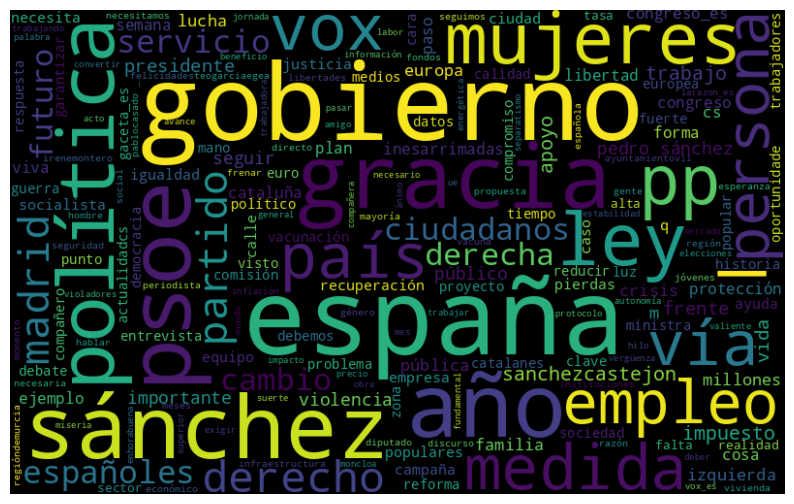

In [16]:
# Nube de palabras
all_words = ' '.join([text for text in df['Cleaned_Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

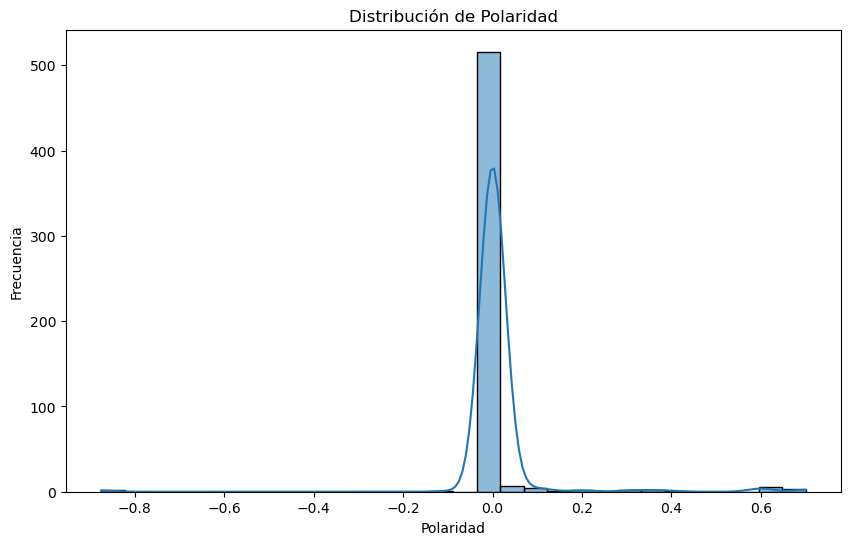

In [17]:
# Histograma de polaridad
plt.figure(figsize=(10, 6))
sns.histplot(df['Polarity'], kde=True, bins=30)
plt.title('Distribución de Polaridad')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.show()

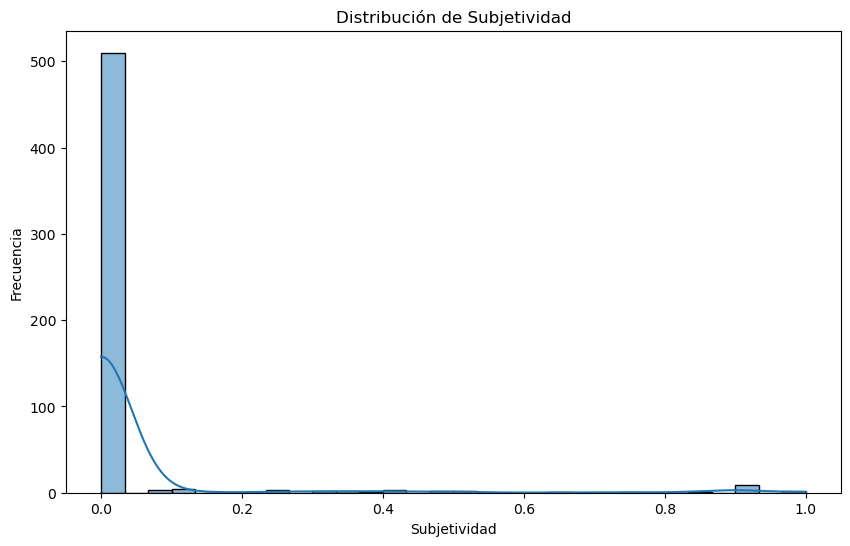

In [18]:
# Histograma de subjetividad
plt.figure(figsize=(10, 6))
sns.histplot(df['Subjectivity'], kde=True, bins=30)
plt.title('Distribución de Subjetividad')
plt.xlabel('Subjetividad')
plt.ylabel('Frecuencia')
plt.show()

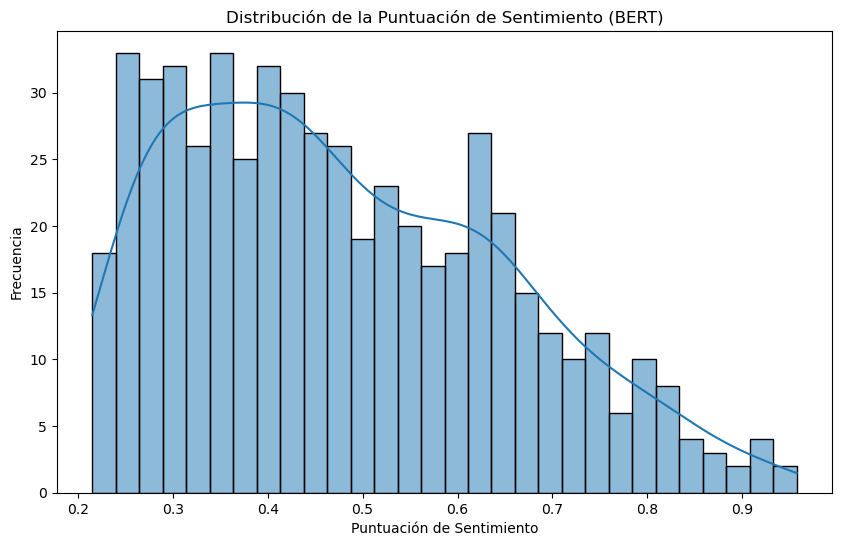

In [19]:
# Histograma de puntuación de sentimientos usando el modelo BERT
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Score'], kde=True, bins=30)
plt.title('Distribución de la Puntuación de Sentimiento (BERT)')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

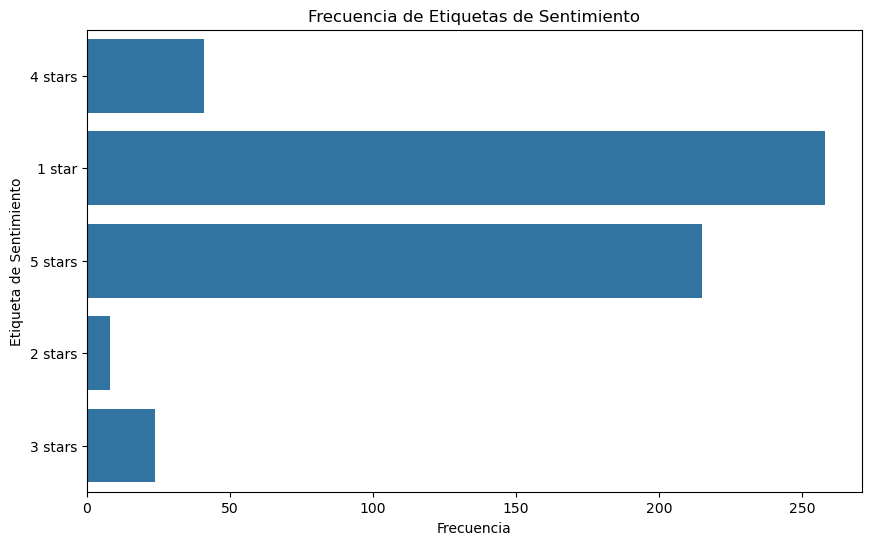

In [20]:
# Opcional: Visualización de frecuencias de las emociones detectadas por BERT
plt.figure(figsize=(10, 6))
sns.countplot(y='Sentiment_Label', data=df)
plt.title('Frecuencia de Etiquetas de Sentimiento')
plt.xlabel('Frecuencia')
plt.ylabel('Etiqueta de Sentimiento')
plt.show()